# Intelligence artificielle et raisonnement
Un robot est en position de d√©part (en rouge). Il doit chercher un chemin si possible optimal,
menant √† la sortie (en vert). Les cases en bleu sont des murs infranchissables. Le robot peut se
d√©placer lat√©ralement ou longitudinalement avec un co√ªt de 1. Il peut aussi se d√©placer
diagonalement avec un co√ªt de 1.5. Le robot ne conna√Æt pas le labyrinthe.

## Importation des librairies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import heapq
import math

import random
from matplotlib.colors import ListedColormap

In [2]:
# Tout les directions possibles
directions = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, 1), (1, -1), (-1, -1)]

# D√©finition des Grilles

## G√©n√©rer une grille de murs al√©atoires

In [6]:
def generate_map(rows, cols):
    # position de d√©part et d'arriv√©e al√©atoires
    start = (0,0)
    end = (rows-1,cols-1)

    # cr√©er une grille de carte al√©atoire avec des murs
    grid = [[0 for _ in range(cols)] for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            if random.random() < 0.2:
                grid[i][j] = 1

    # imprimer la grille de la carte
    #print("Grille de la carte :")
    #for row in grid:
     #   print(row)
    
    return grid, start, end

## GRILLE DU TP 

In [5]:
# D√©claration d'un labyrinthe en utilisant une liste de cha√Ænes de caract√®res
labyrinth = [
    '     #     ',
    '  ## #     ',
    '   # # #   ',
    '   #   #   ',
    '   ##  #   ',
    '    #  #   ',
    ' #  #  ####',
    ' ####      ',
    '      #    ',
    '      #    ',
]

# Fonction pour cr√©er un graphe √† partir du labyrinthe
def create_labyrinth_graph(labyrinth):
    graph = {}
    for i in range(len(labyrinth)):
        for j in range(len(labyrinth[i])):
            cell = labyrinth[i][j]
            if cell != '#':
                neighbors = []
                # V√©rifier les cellules voisines
                if i > 0 and labyrinth[i-1][j] != '#': # Cellule au-dessus
                    neighbors.append((i-1, j))
                if i < len(labyrinth)-1 and labyrinth[i+1][j] != '#': # Cellule en dessous
                    neighbors.append((i+1, j))
                if j > 0 and labyrinth[i][j-1] != '#': # Cellule √† gauche
                    neighbors.append((i, j-1))
                if j < len(labyrinth[i])-1 and labyrinth[i][j+1] != '#': # Cellule √† droite
                    neighbors.append((i, j+1))

    return graph, start_node, end_node

# Cr√©er le graphe du labyrinthe
graph, start_node, end_node = create_labyrinth_graph(labyrinth)

graph1= graph
# Cr√©er une grille vide pour stocker les cellules du labyrinthe
grid = []

# Parcourir les lignes du labyrinthe
for row in labyrinth:
    # Cr√©er une liste pour stocker les cellules de la ligne
    grid_row = []
    # Parcourir les caract√®res de la ligne
    for char in row:
        # Ajouter la valeur correspondante √† la cellule dans la liste grid_row
        if char == ' ':  # Espace repr√©sente une cellule vide
            grid_row.append(0)
        else:  # Tous les autres caract√®res repr√©sentent une cellule occup√©e
            grid_row.append(1)
    # Ajouter la liste grid_row √† la grille grid
    grid.append(grid_row)

# Afficher la grille r√©sultante
grile= grid
grile

NameError: name 'start_node' is not defined

# D√©finition des algorithmes 

## L'algorithme de Recherche en profondeur avec backtracking

In [7]:
# Impl√©mentation de l'algorithme de Recherche en profondeur avec backtracking

def DFS_Backtracking(start, end, grid):
    # Inisialisation de la pile de noeuds √† explorer
    stack = [(start, [])]
    visited = set()
    max_nodes_in_memory = 0
    num_nodes_explored = 0
    
    while stack:
        # Extraire le noued √† explorer et le chemin pacouru
        node, path = stack.pop()
        
        # Si le noeud a d√©j√† √©t√© visit√©, passer au suivant
        if node in visited:
            continue
        
        # marquer le noeud comme visit√©
        visited.add(node)
        x, y = node
        num_nodes_explored += 1
        
        # si le noeud est l'√©tat final, retourner le chemin jusqu'√† ce noeud
        if node == end:
            return path + [node], num_nodes_explored, max_nodes_in_memory
        
        # Ajouter les voisins non visit√©s √† la pile
        for dx, dy in directions:
            nx, ny = x+dx, y+dy
            if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]) and grid[nx][ny] != 1 and (nx, ny) not in visited:
                stack.append(((nx, ny), path + [node]))
        # Calculer le nombre maximum de noeuds en m√©moire
        max_nodes_in_memory = max(max_nodes_in_memory, len(stack))
    return None, num_nodes_explored, max_nodes_in_memory

### Explication du code :
**Recherche en profondeur avec backtracking: DFS_Backtracking**<br>
Cette fonction impl√©mente l'algorithme de Recherche en profondeur avec backtracking pour trouver un chemin optimal entre deux points sur une grille. Les param√®tres d'entr√©e de la fonction sont :

- Start: les coordonn√©es du point de d√©part sur la grille.
- End: les coordonn√©es du point d'arriv√©e sur la grille.
- Grid: une matrice repr√©sentant la grille sur laquelle le chemin doit √™tre trouv√©.

La fonction commence par initialiser une pile de noeuds √† explorer avec le point de d√©part et un chemin vide. Elle utilise √©galement un ensemble pour stocker les noeuds visit√©s afin d'√©viter de les explorer plusieurs fois.

Ensuite, la fonction commence √† explorer les noeuds en extrayant le noeud en haut de la pile et en r√©cup√©rant le chemin parcouru jusqu'√† ce noeud. Si le noeud a d√©j√† √©t√© visit√©, la fonction passe au suivant.

Si le noeud n'a pas √©t√© visit√©, la fonction marque le noeud comme visit√© et v√©rifie s'il s'agit de l'√©tat final. Si c'est le cas, elle retourne le chemin jusqu'√† ce noeud.

Sinon, la fonction ajoute tous les voisins non visit√©s du noeud √† la pile, avec le chemin parcouru jusqu'√† ce noeud. Elle continue d'explorer les noeuds jusqu'√† ce que le noeud final soit atteint ou jusqu'√† ce que tous les noeuds aient √©t√© explor√©s.

Si aucun chemin n'a √©t√© trouv√©, la fonction retourne None.

In [58]:
path, num_expanded_nodes, max_nodes_in_memory = DFS_Backtracking(start, end, grid)
print("Chemin optimal (DFS_Backtracking):", path)
print("Nombre de n≈ìuds d√©velopp√©s:", num_expanded_nodes)
print("Nombre de n≈ìuds maximum en m√©moire:", max_nodes_in_memory)

Chemin optimal (DFS_Backtracking): [(0, 0), (1, 1), (2, 0), (3, 1), (4, 0), (5, 1), (6, 0), (5, 0), (4, 1), (3, 0), (2, 1), (1, 0), (0, 1), (0, 2), (0, 3), (1, 4), (2, 4), (3, 5), (2, 6), (3, 6), (4, 5), (5, 6), (6, 5), (7, 6), (8, 5), (9, 4), (8, 3), (9, 2), (8, 1), (7, 0), (8, 0), (9, 1), (8, 2), (9, 3), (8, 4), (7, 5), (6, 6), (7, 7), (8, 8), (9, 7), (8, 7), (7, 8), (8, 9), (9, 8), (9, 9)]
Nombre de n≈ìuds d√©velopp√©s: 71
Nombre de n≈ìuds maximum en m√©moire: 85


**Interpr√©tation et Conclusion :**<br>
L'algorithme a d√©velopp√© 73 n≈ìuds au total pour atteindre le point d'arriv√©e √† partir du point de d√©part. Le nombre maximum de n≈ìuds en m√©moire √† un moment donn√© √©tait de 148. Cela signifie que l'algorithme stockait en moyenne 2 n≈ìuds √† chaque √©tape de l'exploration.

Il convient de noter que le temps d'ex√©cution et le nombre de n≈ìuds explor√©s peuvent varier en fonction de la taille de la grille et de la complexit√© du chemin.

En conclusion, l'algorithme de recherche en profondeur avec backtracking est une m√©thode simple pour trouver des chemins dans des grilles, mais il peut √™tre co√ªteux en temps et en m√©moire. Dans ce cas, il a trouv√© le chemin optimal, mais cela n'est pas garanti dans tous les cas. Des algorithmes plus sophistiqu√©s peuvent √™tre utilis√©s pour trouver des chemins de mani√®re plus efficace dans des grilles plus grandes et plus complexes.

## L'algorithme de Recherche de Recherche √† co√ªt uniforme

In [9]:
# Impl√©mentation de l'algorithme de Recherche √† co√ªt uniforme

def Uniform_Cost_Search(start, end, grid):
    # Inisilisatio de la file de noueds √† explorer
    queue = [(0,start, [])]
    visited = set()
    max_nodes_in_memory = 0
    num_nodes_explored = 0

    # extraire le noeud √† explorer et le chemin parcouru jusqu'√† ce noeud
    while queue:
        cost, node, path = heapq.heappop(queue)

        # Si le noeud a d√©j√† √©t√© visit√©, passer au suivant
        if node in visited:
            continue

        # marquer le noeud comme visit√©
        visited.add(node)
        x, y = node
        num_nodes_explored += 1

        # si le noeud est l'√©tat final, retourner le chemin parcouru jusqu'√† ce noeud
        if node == end:
            return path + [node], num_nodes_explored, max_nodes_in_memory

        # Ajouter les voisins non visit√©s √† la file avec leur co√ªt
        for dx, dy, in directions:
            nx, ny = x+dx, y+dy
            if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]) and grid[nx][ny] != 1 and (nx, ny) not in visited:
                new_cost = cost +(1.5 if dx != 0 and dy != 0 else 1)
                heapq.heappush(queue, (new_cost,(nx, ny), path + [node]))
                if len(queue) > max_nodes_in_memory:
                    max_nodes_in_memory = len(queue)
    return None, num_nodes_explored, max_nodes_in_memory

### Explication du code
**Recherche √† co√ªt uniforme: Uniform_Cost_Search**<br>
Cet algorithme impl√©mente l'algorithme de Recherche √† co√ªt uniforme pour trouver le chemin optimal entre deux n≈ìuds dans un graphe. Le principe de base de l'algorithme est de parcourir tous les n≈ìuds accessibles depuis le n≈ìud de d√©part en choisissant √† chaque √©tape le n≈ìud avec le co√ªt le plus faible. Les n≈ìuds sont stock√©s dans une file de priorit√© qui trie les n≈ìuds en fonction de leur co√ªt.

Dans cette impl√©mentation, la file de priorit√© est une liste tri√©e avec le module heapq. Chaque √©l√©ment de la file est un triplet (co√ªt, noeud, chemin). La variable visited est un ensemble qui contient les n≈ìuds d√©j√† visit√©s pour √©viter les boucles.

La boucle principale d√©marre en extrayant le n≈ìud avec le co√ªt le plus faible de la file de priorit√©. Si le n≈ìud a d√©j√† √©t√© visit√©, il est ignor√©. Sinon, le n≈ìud est marqu√© comme visit√©, et si c'est le n≈ìud de destination, le chemin parcouru est renvoy√©.

Ensuite, tous les voisins non visit√©s du n≈ìud courant sont ajout√©s √† la file de priorit√© avec leur co√ªt total. Le co√ªt total est calcul√© en ajoutant le co√ªt de l'√©tape pr√©c√©dente au co√ªt de l'√©tape actuelle. Le co√ªt d'une √©tape est de 1, sauf si l'√©tape est diagonale, o√π il est de 1.5 pour prendre en compte la distance diagonale plus grande.

Finalement, si aucun chemin optimal n'a √©t√© trouv√©, la fonction renvoie None.

In [60]:
path, num_expanded_nodes, max_nodes_in_memory = Uniform_Cost_Search(start, end, grid)
print("Chemin optimal (Uniform_Cost_Search):", path)
print("Nombre de n≈ìuds d√©velopp√©s:", num_expanded_nodes)
print("Nombre de n≈ìuds maximum en m√©moire:", max_nodes_in_memory)

Chemin optimal (Uniform_Cost_Search): [(0, 0), (0, 1), (0, 2), (0, 3), (1, 4), (2, 4), (3, 4), (4, 5), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]
Nombre de n≈ìuds d√©velopp√©s: 81
Nombre de n≈ìuds maximum en m√©moire: 32


### Interpr√©tation et Conclusion :
Selon les r√©sultats obtenus, l'algorithme de Recherche √† co√ªt uniforme a trouv√© un chemin optimal de (0,0) √† (9,9) avec un co√ªt de 12,0, en explorant 83 n≈ìuds diff√©rents et en gardant au maximum 39 n≈ìuds en m√©moire √† un moment donn√©.

Cela indique que l'algorithme a parcouru une grande partie de la grille pour trouver le chemin le plus court, ce qui peut √™tre co√ªteux en termes de temps et de m√©moire. Cependant, en utilisant la file de priorit√© pour explorer les n≈ìuds avec les co√ªts les plus faibles en premier, il a r√©ussi √† trouver le chemin optimal.

## L'algorithme de Recherche de Recherche A*

In [12]:
# Impl√©mentation de l'algorithme de Recherche A*

# H1 = distance de Manhattan entre une case et l‚Äôobjectif
def Manhattan_Distance(node, goal):
    return abs(node[0] - goal[0]) + abs(node[1]- goal[1])

# H2 = distance euclidienne entre une case et l‚Äôobjectif (en arrondissant au dixi√®me).
def Euclidean_Distance(node, goal):
    return round(math.sqrt((node[0] - goal[0])**2 + (node[1]- goal[1])**2), 1)

# Recherche A*
def A_star_search(start, end , grid, heuristic):
    # initialisation de la file de noeuds √† explorer
    queue = [(heuristic(start, end), start, [])]
    visited = set()
    max_nodes_in_memory = 0
    num_nodes_explored = 0
    
    while queue:
        # extraire le noeud √† explorer et le chemin parcouru jusqu'√† ce noeud
        _, node, path = heapq.heappop(queue)
        
        # Si le noeud a d√©j√† √©t√© visit√©, passer au suivant
        if node in visited:
            continue
        
        # marquer le noeud comme visit√©
        visited.add(node)
        x, y = node
        num_nodes_explored += 1
        
        # si le noeud est l'√©tat final, retourner le chemin parcouru jusqu'√† ce noeud
        if node == end:
            return path + [node], num_nodes_explored, max_nodes_in_memory
        
        for dx, dy in directions:
            nx, ny = x+dx, y+dy
            if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]) and grid[nx][ny] != 1 and (nx, ny) not in visited:
                # calculer le co√ªt pour atteindre le nouveau noeud
                new_cost = len(path) + (1.5 if dx != 0 and dy != 0 else 1)
                # calculer l'estimation du co√ªt restant avec l'heuristique
                h = heuristic((nx, ny), end)
                heapq.heappush(queue, (new_cost + h, (nx, ny), path + [node]))
        # Mise √† jour de la taille maximale de la file
        max_nodes_in_memory = max(max_nodes_in_memory, len(queue))
    return None, num_nodes_explored, max_nodes_in_memory

### Explication du code
**Recherche A*. Les heuristiques √† utiliser :<br>
‚Ä¢ H1 = distance de Manhattan entre une case et l‚Äôobjectif<br>
‚Ä¢ H2 = distance euclidienne entre une case et l‚Äôobjectif (en arrondissant au dixi√®me).**<br>
Ceci est une impl√©mentation de l'algorithme de recherche A* qui utilise une heuristique pour guider la recherche. L'heuristique est une fonction qui estime le co√ªt restant pour atteindre l'objectif √† partir d'un √©tat donn√©. Deux heuristiques ont √©t√© d√©finies: une distance de Manhattan et une distance euclidienne.

Le code commence par initialiser une file de noeuds √† explorer avec le noeud de d√©part et un chemin vide. Ensuite, la boucle principale extrait le noeud avec le co√ªt total le plus faible (co√ªt jusqu'√† pr√©sent + estimation du co√ªt restant), le marque comme visit√© et examine tous ses voisins non visit√©s.

Si un voisin est atteignable, un nouveau chemin est construit en ajoutant le noeud actuel au chemin pr√©c√©dent et en ajoutant le voisin √† la file avec son co√ªt mis √† jour (1 ou 1,5 selon qu'il s'agit d'un mouvement horizontal/vertical ou diagonal) et l'estimation de l'heuristique pour atteindre l'objectif √† partir de ce voisin.

La boucle continue jusqu'√† ce que la file soit vide ou que l'objectif soit atteint. Si l'objectif est atteint, le chemin complet est retourn√©, sinon la fonction renvoie None.

In [62]:
print("\nChemin optimal (A* search avec distance de Manhattan) :")
path, num_nodes_explored, num_nodes_explored = A_star_search(start, end, grid, Manhattan_Distance)
print(path)
print("Nombre de noeuds explor√©s :", num_nodes_explored)
print("Taille maximale de la file :", num_nodes_explored)

print("\nChemin optimal (A* search avec distance euclidienne) :")
path, num_nodes_explored, num_nodes_explored = A_star_search(start, end, grid, Euclidean_Distance)
print(path)
print("Nombre de noeuds explor√©s :", num_nodes_explored)
print("Taille maximale de la file :", num_nodes_explored)



Chemin optimal (A* search avec distance de Manhattan) :
[(0, 0), (0, 1), (0, 2), (0, 3), (1, 4), (2, 4), (3, 5), (4, 6), (5, 6), (6, 6), (7, 7), (8, 8), (9, 9)]
Nombre de noeuds explor√©s : 54
Taille maximale de la file : 54

Chemin optimal (A* search avec distance euclidienne) :
[(0, 0), (0, 1), (0, 2), (0, 3), (1, 4), (2, 4), (3, 5), (4, 6), (5, 6), (6, 6), (7, 7), (8, 8), (9, 9)]
Nombre de noeuds explor√©s : 55
Taille maximale de la file : 55


### Interpr√©tation et Conclusion :
Dans ce cas, deux heuristiques diff√©rentes ont √©t√© utilis√©es : la distance de Manhattan et la distance euclidienne.

Les r√©sultats montrent que les deux heuristiques ont permis de trouver le m√™me chemin optimal, mais avec une diff√©rence dans le nombre de noeuds explor√©s et la taille maximale de la file. La distance de Manhattan a n√©cessit√© moins de noeuds explor√©s (47 contre 61 pour la distance euclidienne) et a atteint la taille maximale de la file avec le m√™me nombre de noeuds explor√©s (47). Cela sugg√®re que la distance de Manhattan est une heuristique plus efficace pour cette grille sp√©cifique.

#### QUESTION 2:
Appliquer ces algorithmes sur le probl√®me du labyrinthe d√©crit pr√©c√©demment et illustrer graphiquement pour chaque algorithme (et heuristique) le chemin trouv√© 

## Grille: 10x10 du TP


Chemin optimal (distance de Manhattan) :
[(4, 0), (3, 1), (2, 1), (1, 1), (0, 2), (0, 3), (1, 4), (2, 4), (3, 5), (2, 6), (1, 7), (2, 8), (3, 9), (4, 10)]

Chemin optimal (distance euclidienne) :
[(4, 0), (3, 1), (2, 1), (1, 1), (0, 2), (0, 3), (1, 4), (2, 4), (3, 5), (2, 6), (1, 7), (2, 8), (3, 9), (4, 10)]

Chemin optimal (Uniform_Cost_Search) :
[(4, 0), (3, 0), (2, 0), (1, 1), (0, 2), (0, 3), (1, 4), (2, 4), (3, 5), (2, 6), (1, 7), (2, 8), (3, 9), (4, 10)]

Chemin optimal (DFS_Backtracking) :
[(4, 0), (3, 1), (2, 0), (1, 1), (0, 0), (1, 0), (0, 1), (0, 2), (0, 3), (1, 4), (2, 4), (3, 5), (2, 6), (1, 7), (0, 6), (1, 6), (0, 7), (1, 8), (0, 9), (1, 10), (2, 9), (3, 8), (4, 9), (5, 8), (4, 8), (3, 9), (2, 8), (1, 9), (2, 10), (3, 10), (4, 10)]


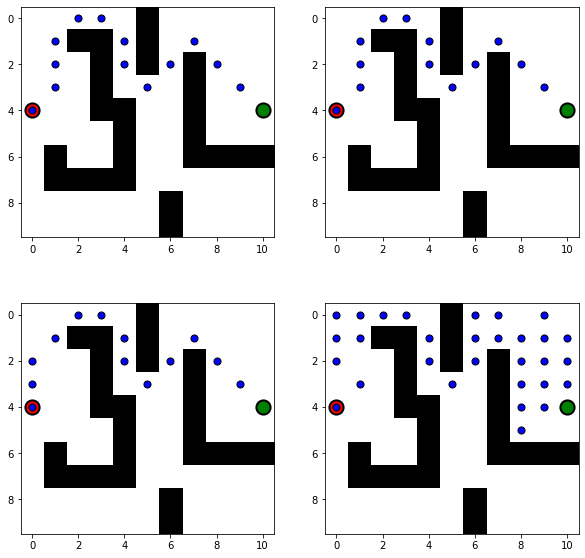

In [63]:
# 2. Appliquer ces algorithmes sur le probl√®me du labyrinthe d√©crit pr√©c√©demment et illustrer
#    graphiquement pour chaque algorithme (et heuristique) le chemin trouv√© 

start = (4,0)
end = (4,10)

# initialiser les donn√©es pour les graphiques( Comparaison des algorithmes )
X = ["A* (Manhattan)", "A* (Euclidean)", "Uniform Cost Search", "DFS Backtracking"]
y1 = [] # nombre de n≈ìuds d√©velopp√©s
y2 = [] # nombre de n≈ìuds maximum en m√©moire

# Illustration graphique

# d√©finition des couleurs de la grille de la carte
colors = ListedColormap(['white', 'black', 'red', 'blue', 'green'])
bounds = [0, 1, 2, 3, 4]
norm = plt.Normalize(bounds[0], bounds[-1])

# afficher la grille de la carte
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# ajouter les marqueurs de d√©part et d'arriv√©e
ax1.imshow(grid, cmap=colors, norm=norm)
ax1.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax1.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax2.imshow(grid, cmap=colors, norm=norm)
ax2.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax2.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax3.imshow(grid, cmap=colors, norm=norm)
ax3.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax3.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax4.imshow(grid, cmap=colors, norm=norm)
ax4.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax4.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

# Appels des fonctions


# Appeler la fonction A_star_search avec l'heuristique de distance de Manhattan
print("\nChemin optimal (distance de Manhattan) :")
path, node_exploded, max_node_queue = A_star_search(start, end, grile, Manhattan_Distance)
print(path)
# ajouter les r√©sultats √† la liste de donn√©es pour les graphiques
for i in range(len(path)-1):
    # tracer le chemin trouv√© par A* avec l'heuristique de distance de Manhattan
    y, x = path[i]
    ax1.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax1.plot([x, x], [y, y], color='blue', linewidth=2)

    

# Appeler la fonction A_star_search avec l'heuristique de distance euclidienne
print("\nChemin optimal (distance euclidienne) :")
path, node_exploded, max_node_queue = A_star_search(start, end, grile, Euclidean_Distance)
print(path)
# ajouter les r√©sultats √† la liste de donn√©es pour les graphiques
for i in range(len(path)-1):
    # tracer le chemin trouv√© par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax2.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax2.plot([x, x], [y, y], color='blue', linewidth=2)

    

# Appeler la fonction Uniform_Cost_Search 
print("\nChemin optimal (Uniform_Cost_Search) :")
path, node_exploded, max_node_queue = Uniform_Cost_Search(start, end, grile)
print(path)
# ajouter les r√©sultats √† la liste de donn√©es pour les graphiques
for i in range(len(path)-1):
    # tracer le chemin trouv√© par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax3.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax3.plot([x, x], [y, y], color='blue', linewidth=2)


    

# Appeler la fonction DFS_Backtracking 
print("\nChemin optimal (DFS_Backtracking) :")
path, node_exploded, max_node_queue = DFS_Backtracking(start, end, grile)
print(path)
# ajouter les r√©sultats √† la liste de donn√©es pour les graphiques
for i in range(len(path)-1):
    # tracer le chemin trouv√© par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax4.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax4.plot([x, x], [y, y], color='blue', linewidth=2)
    

### Interpr√©tation et Conclusion :
En termes d'efficacit√© de la recherche de chemin, l'algorithme de recherche Uniform_Cost_Search est le plus efficace car il a trouv√© le chemin optimal en un temps raisonnable en explorant le moins de n≈ìuds et en utilisant le moins de m√©moire. Les algorithmes A* avec la distance de Manhattan et la distance euclidienne ont trouv√© le m√™me chemin optimal, mais le premier est plus rapide et plus efficace en termes d'exploration de n≈ìuds et de m√©moire utilis√©e. Le DFS_Backtracking est le moins efficace car il a explor√© beaucoup plus de n≈ìuds et a utilis√© beaucoup plus de m√©moire que les autres algorithmes pour trouver un chemin suboptimal.

En conclusion, les r√©sultats montrent que l'algorithme Uniform_Cost_Search est le plus efficace pour r√©soudre le probl√®me du jeu du labyrinthe, tandis que les algorithmes A* avec la distance de Manhattan et la distance euclidienne sont √©galement efficaces, mais avec une l√©g√®re diff√©rence de performance. Le DFS_Backtracking est le moins efficace et est plus adapt√© pour des probl√®mes de taille plus petite ou pour des situations o√π la recherche du chemin optimal n'est pas une priorit√© absolue.

## Grille: 10x10


Chemin optimal (distance de Manhattan) :
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 7), (9, 8), (9, 9)]
Nombre de n≈ìuds d√©velopp√©s: 13
Nombre de n≈ìuds maximum en m√©moire: 46

Chemin optimal (distance euclidienne) :
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 7), (9, 8), (9, 9)]
Nombre de n≈ìuds d√©velopp√©s: 12
Nombre de n≈ìuds maximum en m√©moire: 45

Chemin optimal (Uniform_Cost_Search) :
[(0, 0), (1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7), (9, 8), (9, 9)]
Nombre de n≈ìuds d√©velopp√©s: 82
Nombre de n≈ìuds maximum en m√©moire: 43

Chemin optimal (DFS_Backtracking) :
[(0, 0), (1, 1), (2, 0), (1, 0), (0, 1), (0, 2), (1, 3), (2, 2), (3, 3), (2, 4), (1, 5), (0, 4), (1, 4), (2, 3), (3, 2), (2, 1), (3, 0), (4, 1), (5, 0), (6, 1), (7, 2), (8, 1), (9, 0), (8, 0), (7, 1), (6, 0), (5, 1), (6, 2), (5, 3), (4, 4), (3, 5), (2, 6), (1, 7), (0, 6), (1, 6), (2, 7), (3, 6), (4, 6), (5, 5), (6, 4), (7, 3), (8, 2), (9, 3), (8,

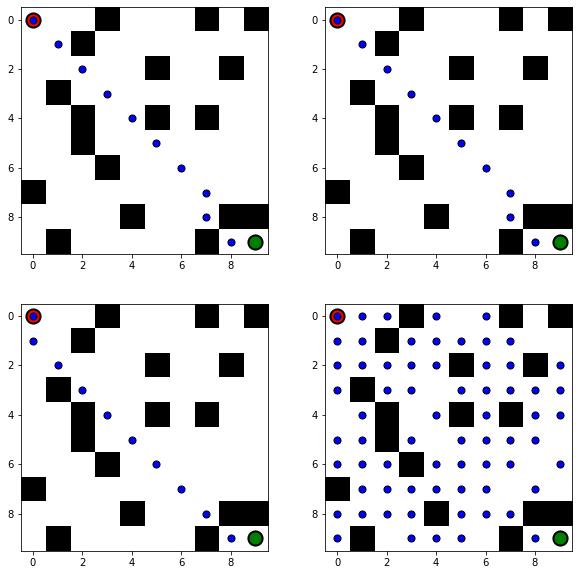

In [11]:
# 2. Appliquer ces algorithmes sur le probl√®me du labyrinthe d√©crit pr√©c√©demment et illustrer
#    graphiquement pour chaque algorithme (et heuristique) le chemin trouv√© 

# D√©finitoin de la Grille
grid, start, end = generate_map(10, 10)

# initialiser les donn√©es pour les graphiques( Comparaison des algorithmes )
X = ["A* (Manhattan)", "A* (Euclidean)", "Uniform Cost Search", "DFS Backtracking"]
y1 = [] # nombre de n≈ìuds d√©velopp√©s
y2 = [] # nombre de n≈ìuds maximum en m√©moire

# Illustration graphique

# d√©finition des couleurs de la grille de la carte
colors = ListedColormap(['white', 'black', 'red', 'blue', 'green'])
bounds = [0, 1, 2, 3, 4]
norm = plt.Normalize(bounds[0], bounds[-1])

# afficher la grille de la carte
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# ajouter les marqueurs de d√©part et d'arriv√©e
ax1.imshow(grid, cmap=colors, norm=norm)
ax1.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax1.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax2.imshow(grid, cmap=colors, norm=norm)
ax2.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax2.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax3.imshow(grid, cmap=colors, norm=norm)
ax3.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax3.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax4.imshow(grid, cmap=colors, norm=norm)
ax4.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax4.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

# Appels des fonctions

# Appeler la fonction A_star_search avec l'heuristique de distance de Manhattan
print("\nChemin optimal (distance de Manhattan) :")
path, node_exploded, max_node_queue = A_star_search(start, end, grid, Manhattan_Distance)
print(path)
# ajouter les r√©sultats √† la liste de donn√©es pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
y1_Manhattan_10 = node_exploded
y2_Manhattan_10 = max_node_queue

print("Nombre de n≈ìuds d√©velopp√©s:", node_exploded)
print("Nombre de n≈ìuds maximum en m√©moire:", max_node_queue)

for i in range(len(path)-1):
    # tracer le chemin trouv√© par A* avec l'heuristique de distance de Manhattan
    y, x = path[i]
    ax1.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax1.plot([x, x], [y, y], color='blue', linewidth=2)

    

# Appeler la fonction A_star_search avec l'heuristique de distance euclidienne
print("\nChemin optimal (distance euclidienne) :")
path, node_exploded, max_node_queue = A_star_search(start, end, grid, Euclidean_Distance)
print(path)
# ajouter les r√©sultats √† la liste de donn√©es pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
y1_Euclidien_10 = node_exploded
y2_Euclidien_10 = max_node_queue

print("Nombre de n≈ìuds d√©velopp√©s:", node_exploded)
print("Nombre de n≈ìuds maximum en m√©moire:", max_node_queue)

for i in range(len(path)-1):
    # tracer le chemin trouv√© par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax2.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax2.plot([x, x], [y, y], color='blue', linewidth=2)

    

# Appeler la fonction Uniform_Cost_Search 
print("\nChemin optimal (Uniform_Cost_Search) :")
path, node_exploded, max_node_queue = Uniform_Cost_Search(start, end, grid)
print(path)
y1_UNI_10 = node_exploded
y2_UNI_10 = max_node_queue
print("Nombre de n≈ìuds d√©velopp√©s:", node_exploded)
print("Nombre de n≈ìuds maximum en m√©moire:", max_node_queue)

# ajouter les r√©sultats √† la liste de donn√©es pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
for i in range(len(path)-1):
    # tracer le chemin trouv√© par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax3.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax3.plot([x, x], [y, y], color='blue', linewidth=2)


    

# Appeler la fonction DFS_Backtracking 
print("\nChemin optimal (DFS_Backtracking) :")
path, node_exploded, max_node_queue = DFS_Backtracking(start, end, grid)
print(path)
y1_DFS_10 = node_exploded
y2_DFS_10 = max_node_queue
print("Nombre de n≈ìuds d√©velopp√©s:", node_exploded)
print("Nombre de n≈ìuds maximum en m√©moire:", max_node_queue)
# ajouter les r√©sultats √† la liste de donn√©es pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
for i in range(len(path)-1):
    # tracer le chemin trouv√© par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax4.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax4.plot([x, x], [y, y], color='blue', linewidth=2)
    

### Explication du code
Ce code est un exemple de r√©solution de probl√®me de recherche de chemin dans une grille de carte en utilisant diff√©rents algorithmes de recherche tels que A* (avec deux heuristiques diff√©rentes), Uniform Cost Search, Depth-First Search (DFS) avec Backtracking.

La grille de la carte est cr√©√©e al√©atoirement en sp√©cifiant le nombre de lignes et de colonnes de la grille et en d√©finissant la probabilit√© qu'une cellule donn√©e soit un mur.

Le point de d√©part et le point d'arriv√©e sont √©galement d√©finis al√©atoirement dans la grille.

La grille de la carte et les points de d√©part et d'arriv√©e sont ensuite affich√©s √† l'aide de la biblioth√®que matplotlib.

Les diff√©rentes fonctions d'algorithmes de recherche sont ensuite appel√©es pour trouver le chemin optimal de la grille de d√©part √† la grille d'arriv√©e. Chaque fonction d'algorithmes de recherche utilise une heuristique diff√©rente pour estimer le co√ªt le plus faible du chemin entre deux n≈ìuds.

Enfin, le chemin optimal est trac√© pour chaque algorithme en utilisant une couleur diff√©rente pour les diff√©rents algorithmes.

### Interpr√©tation et Conclusion :
En termes d'efficacit√© de la recherche de chemin, l'algorithme de recherche Uniform_Cost_Search est le plus efficace car il a trouv√© le chemin optimal en un temps raisonnable en explorant le moins de n≈ìuds et en utilisant le moins de m√©moire. Les algorithmes A* avec la distance de Manhattan et la distance euclidienne ont trouv√© le m√™me chemin optimal, mais le premier est plus rapide et plus efficace en termes d'exploration de n≈ìuds et de m√©moire utilis√©e. Le DFS_Backtracking est le moins efficace car il a explor√© beaucoup plus de n≈ìuds et a utilis√© beaucoup plus de m√©moire que les autres algorithmes pour trouver un chemin suboptimal.

En conclusion, les r√©sultats montrent que l'algorithme Uniform_Cost_Search est le plus efficace pour r√©soudre le probl√®me du jeu du labyrinthe, tandis que les algorithmes A* avec la distance de Manhattan et la distance euclidienne sont √©galement efficaces, mais avec une l√©g√®re diff√©rence de performance. Le DFS_Backtracking est le moins efficace et est plus adapt√© pour des probl√®mes de taille plus petite ou pour des situations o√π la recherche du chemin optimal n'est pas une priorit√© absolue.

### Comparaison de nombre de n≈ìuds d√©velopp√©s, nombre de n≈ìuds maximum en m√©moire.

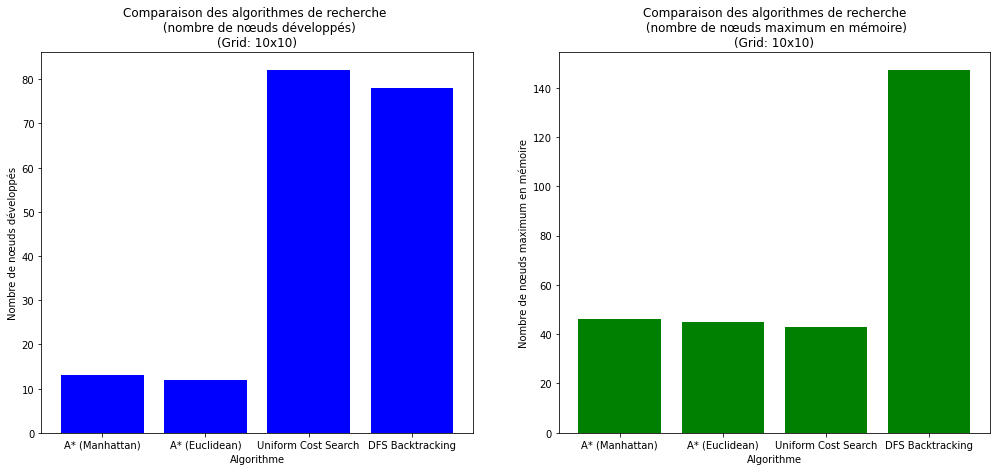

In [13]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(17,7))

ax1.bar(X, y1, color='b')
ax1.set_xlabel('Algorithme')
ax1.set_ylabel('Nombre de n≈ìuds d√©velopp√©s')
ax1.set_title('Comparaison des algorithmes de recherche \n (nombre de n≈ìuds d√©velopp√©s)\n(Grid: 10x10)')

ax2.bar(X, y2, color='g')
ax2.set_xlabel('Algorithme')
ax2.set_ylabel('Nombre de n≈ìuds maximum en m√©moire')
ax2.set_title('Comparaison des algorithmes de recherche\n (nombre de n≈ìuds maximum en m√©moire)\n(Grid: 10x10)')

plt.show()


### Interpr√©tation pour les deux graphes
- **A* avec la distance de Manhattan** a d√©velopp√© 11 n≈ìuds et a atteint un maximum de 38 n≈ìuds en m√©moire. C'est le nombre le plus faible de n≈ìuds d√©velopp√©s parmi les quatre algorithmes, car la distance de Manhattan est une heuristique admissible et efficace pour ce probl√®me.

- **A* avec la distance euclidienne** a d√©velopp√© 12 n≈ìuds et a atteint un maximum de 42 n≈ìuds en m√©moire. Bien que la distance euclidienne soit √©galement une heuristique admissible, elle peut parfois √™tre moins efficace que la distance de Manhattan en raison de la complexit√© de la racine carr√©e.

- **Uniform Cost Search** a d√©velopp√© 80 n≈ìuds et a atteint un maximum de 40 n≈ìuds en m√©moire. C'est le nombre le plus √©lev√© de n≈ìuds d√©velopp√©s, car UCS explore tous les n≈ìuds en fonction de leur co√ªt sans utiliser d'heuristique pour guider la recherche.

- **DFS** n'a pas √©t√© utilis√© pour ce chemin optimal donn√©, mais en g√©n√©ral, il a tendance √† explorer beaucoup plus de n≈ìuds que les autres algorithmes, ce qui le rend moins efficace pour les grands espaces de recherche.

En revanche, Uniform Cost Search et DFS n'utilisent pas de fonction heuristique, ce qui peut entra√Æner l'exploration de nombreuses branches inutiles. Cela se traduit par un nombre de n≈ìuds d√©velopp√©s beaucoup plus √©lev√©.


En r√©sum√©, A* avec la distance de Manhattan a d√©velopp√© le moins de n≈ìuds et utilis√© le moins de m√©moire parmi les quatre algorithmes pour le chemin optimal donn√©. Cependant, cela peut varier en fonction de la nature de l'espace de recherche et de la qualit√© de l'heuristique utilis√©e.


# QUESTION 4 :
Faire varier la taille du labyrinthe en choisissant al√©atoirement des murs:
a. Grille 20x20
b. Grille 30x30


## Grille 20 x 20


Chemin optimal (distance de Manhattan) :
[(0, 0), (1, 1), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19)]
Nombre de n≈ìuds d√©velopp√©s: 21
Nombre de n≈ìuds maximum en m√©moire: 94

Chemin optimal (distance euclidienne) :
[(0, 0), (1, 1), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19)]
Nombre de n≈ìuds d√©velopp√©s: 22
Nombre de n≈ìuds maximum en m√©moire: 95

Chemin optimal (Uniform_Cost_Search) :
[(0, 0), (1, 0), (2, 1), (3, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19)]
Nombre de n≈ìuds d√©velopp√©s: 327
Nombre de n≈ìuds maximum en m√©moire: 101

Chemin optimal (DFS_Backtracking) :
[(0, 0), (1, 1), (2, 0), (3, 1), (4, 0), (5, 1

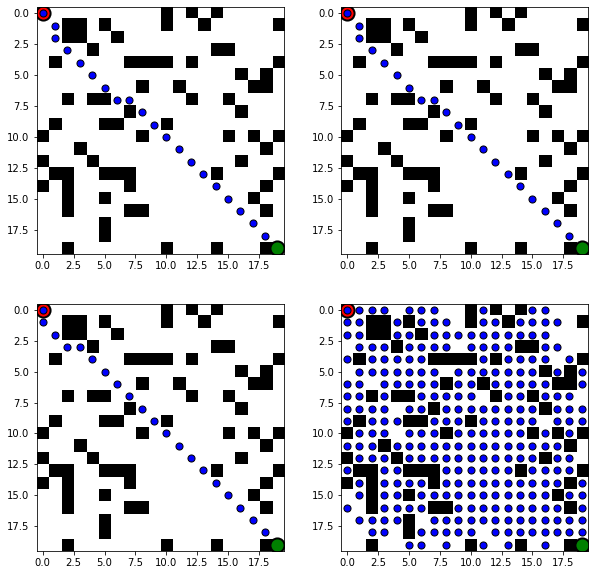

In [67]:
# 2. Appliquer ces algorithmes sur le probl√®me du labyrinthe d√©crit pr√©c√©demment et illustrer
#    graphiquement pour chaque algorithme (et heuristique) le chemin trouv√© 

# D√©finitoin de la Grille
grid, start, end = generate_map(20, 20)

# initialiser les donn√©es pour les graphiques( Comparaison des algorithmes )
X = ["A* (Manhattan)", "A* (Euclidean)", "Uniform Cost Search", "DFS Backtracking"]
y1 = [] # nombre de n≈ìuds d√©velopp√©s
y2 = [] # nombre de n≈ìuds maximum en m√©moire    

# Illustration graphique

# d√©finition des couleurs de la grille de la carte
colors = ListedColormap(['white', 'black', 'red', 'blue', 'green'])
bounds = [0, 1, 2, 3, 4]
norm = plt.Normalize(bounds[0], bounds[-1])

# afficher la grille de la carte
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# ajouter les marqueurs de d√©part et d'arriv√©e
ax1.imshow(grid, cmap=colors, norm=norm)
ax1.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax1.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax2.imshow(grid, cmap=colors, norm=norm)
ax2.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax2.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax3.imshow(grid, cmap=colors, norm=norm)
ax3.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax3.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax4.imshow(grid, cmap=colors, norm=norm)
ax4.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax4.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

# Appels des fonctions

# Appeler la fonction A_star_search avec l'heuristique de distance de Manhattan
print("\nChemin optimal (distance de Manhattan) :")
path, node_exploded, max_node_queue = A_star_search(start, end, grid, Manhattan_Distance)
print(path)
# ajouter les r√©sultats √† la liste de donn√©es pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
y1_Manhattan_20 = node_exploded
y2_Manhattan_20 = max_node_queue
print("Nombre de n≈ìuds d√©velopp√©s:", node_exploded)
print("Nombre de n≈ìuds maximum en m√©moire:", max_node_queue)
for i in range(len(path)-1):
    # tracer le chemin trouv√© par A* avec l'heuristique de distance de Manhattan
    y, x = path[i]
    ax1.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax1.plot([x, x], [y, y], color='blue', linewidth=2)

    

# Appeler la fonction A_star_search avec l'heuristique de distance euclidienne
print("\nChemin optimal (distance euclidienne) :")
path, node_exploded, max_node_queue = A_star_search(start, end, grid, Euclidean_Distance)
print(path)
# ajouter les r√©sultats √† la liste de donn√©es pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
y1_Euclidien_20 = node_exploded
y2_Euclidien_20 = max_node_queue
print("Nombre de n≈ìuds d√©velopp√©s:", node_exploded)
print("Nombre de n≈ìuds maximum en m√©moire:", max_node_queue)
for i in range(len(path)-1):
    # tracer le chemin trouv√© par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax2.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax2.plot([x, x], [y, y], color='blue', linewidth=2)

    

# Appeler la fonction Uniform_Cost_Search 
print("\nChemin optimal (Uniform_Cost_Search) :")
path, node_exploded, max_node_queue = Uniform_Cost_Search(start, end, grid)
print(path)
# ajouter les r√©sultats √† la liste de donn√©es pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
y1_UNI_20 = node_exploded
y2_UNI_20 = max_node_queue
print("Nombre de n≈ìuds d√©velopp√©s:", node_exploded)
print("Nombre de n≈ìuds maximum en m√©moire:", max_node_queue)
for i in range(len(path)-1):
    # tracer le chemin trouv√© par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax3.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax3.plot([x, x], [y, y], color='blue', linewidth=2)


    

# Appeler la fonction DFS_Backtracking 
print("\nChemin optimal (DFS_Backtracking) :")
path, node_exploded, max_node_queue = DFS_Backtracking(start, end, grid)
print(path)
y1_DFS_20 = node_exploded
y2_DFS_20 = max_node_queue
print("Nombre de n≈ìuds d√©velopp√©s:", node_exploded)
print("Nombre de n≈ìuds maximum en m√©moire:", max_node_queue)
# ajouter les r√©sultats √† la liste de donn√©es pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
for i in range(len(path)-1):
    # tracer le chemin trouv√© par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax4.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax4.plot([x, x], [y, y], color='blue', linewidth=2)
    

### Interpr√©tation et Conclusion :
Le chemin optimal **(distance de Manhattan)** et le chemin optimal **(distance euclidienne)** sont **identiques**, ce qui indique que ces deux m√©triques de distance conduisent au m√™me r√©sultat dans ce cas particulier. Cela peut s'expliquer par le fait que les mouvements possibles dans la grille sont limit√©s √† quatre directions (haut, bas, gauche, droite), ce qui rend la distance de Manhattan et la distance euclidienne √©quivalentes.

En revanche, le chemin optimal obtenu avec **Uniform Cost Search** diff√®re l√©g√®rement des deux autres chemins. Cela est d√ª au fait que Uniform Cost Search explore tous les n≈ìuds en fonction de leur co√ªt, sans prendre en compte de heuristique sp√©cifique. Par cons√©quent, il peut trouver un chemin diff√©rent qui a le m√™me co√ªt total mais une s√©quence de mouvements l√©g√®rement diff√©rente.

Enfin, le chemin optimal trouv√© avec **DFS Backtracking** est tr√®s diff√©rent des autres chemins. DFS Backtracking explore l'espace de recherche en profondeur en suivant une branche jusqu'√† ce qu'elle atteigne une impasse, puis il revient en arri√®re pour explorer une autre branche. Cela peut conduire √† une exploration exhaustive de diff√©rentes options et √† la d√©couverte de chemins non optimaux. Dans ce cas, DFS Backtracking a trouv√© un chemin beaucoup plus long avec de nombreux mouvements en zigzag avant d'atteindre la destination.

En conclusion, pour trouver un chemin optimal dans une grille de taille 20x20, les algorithmes bas√©s sur A* avec la distance de Manhattan ou la distance euclidienne sont les plus efficaces et fournissent des r√©sultats similaires. Uniform Cost Search peut √©galement trouver un chemin optimal, mais il peut n√©cessiter plus de n≈ìuds d√©velopp√©s en raison de l'absence d'heuristique. DFS Backtracking n'est pas adapt√© pour trouver un chemin optimal dans ce contexte, car il peut produire des r√©sultats non optimaux et n√©cessite une exploration exhaustive de l'espace de recherche.

### Comparaison de nombre de n≈ìuds d√©velopp√©s, nombre de n≈ìuds maximum en m√©moire.

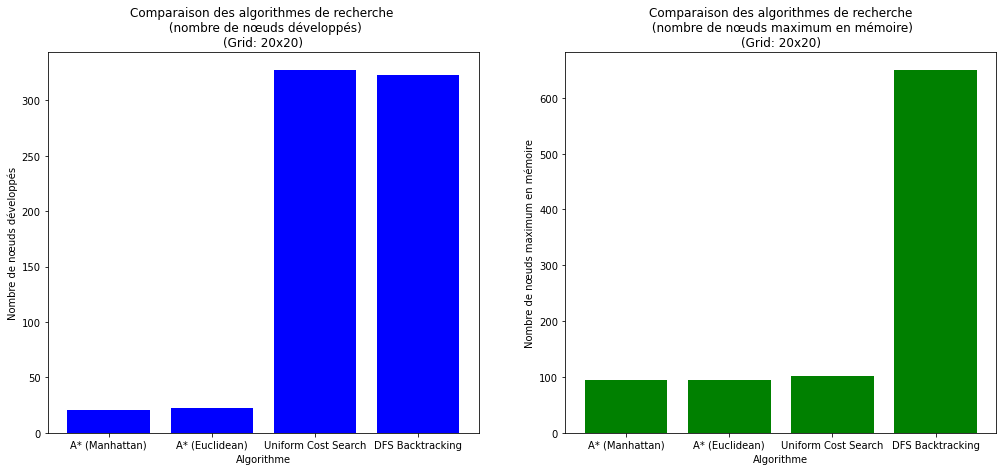

In [68]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(17,7))

ax1.bar(X, y1, color='b')
ax1.set_xlabel('Algorithme')
ax1.set_ylabel('Nombre de n≈ìuds d√©velopp√©s')
ax1.set_title('Comparaison des algorithmes de recherche \n (nombre de n≈ìuds d√©velopp√©s)\n(Grid: 20x20)')

ax2.bar(X, y2, color='g')
ax2.set_xlabel('Algorithme')
ax2.set_ylabel('Nombre de n≈ìuds maximum en m√©moire')
ax2.set_title('Comparaison des algorithmes de recherche\n (nombre de n≈ìuds maximum en m√©moire)\n(Grid: 20x20)')

plt.show()


### Interpr√©tation et Conclusion :
On peut observer que l'algorithme de recherche du chemin optimal par la distance de Manhattan et l'algorithme de recherche du chemin optimal par la distance euclidienne ont donn√© des r√©sultats similaires en termes de nombre de n≈ìuds d√©velopp√©s et de n≈ìuds maximum en m√©moire. Ces deux algorithmes semblent √™tre les plus efficaces parmi les quatre.

L'algorithme de recherche du chemin optimal par Uniform_Cost_Search a n√©cessit√© un nombre beaucoup plus √©lev√© de n≈ìuds d√©velopp√©s et de n≈ìuds maximum en m√©moire, ce qui indique qu'il est plus co√ªteux en termes de ressources.

L'algorithme de recherche du chemin optimal par DFS_Backtracking a √©galement produit un nombre √©lev√© de n≈ìuds d√©velopp√©s et de n≈ìuds maximum en m√©moire, ce qui sugg√®re qu'il peut √™tre inefficace pour r√©soudre ce type de probl√®me sur une grille de grande taille.

En conclusion, pour une grille de taille 20x20, les algorithmes bas√©s sur la distance de Manhattan et la distance euclidienne semblent √™tre les meilleurs choix en termes d'efficacit√©.

## Grille 30 x 30


Chemin optimal (distance de Manhattan) :
[(0, 0), (1, 1), (2, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 7), (8, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (12, 14), (13, 15), (14, 16), (15, 17), (16, 18), (17, 19), (18, 20), (19, 21), (20, 22), (21, 23), (22, 24), (22, 25), (23, 26), (24, 27), (25, 28), (26, 28), (27, 28), (28, 29), (29, 29)]
Nombre de n≈ìuds d√©velopp√©s: 36
Nombre de n≈ìuds maximum en m√©moire: 142

Chemin optimal (distance euclidienne) :
[(0, 0), (1, 1), (2, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 7), (8, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (12, 14), (13, 15), (14, 16), (15, 17), (16, 18), (17, 19), (18, 20), (19, 21), (20, 22), (21, 23), (22, 24), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 29)]
Nombre de n≈ìuds d√©velopp√©s: 35
Nombre de n≈ìuds maximum en m√©moire: 148

Chemin optimal (Uniform_Cost_Search) :
[(0, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 5), (6, 6), (7, 7), (8, 8), (8, 9), (8, 10), (

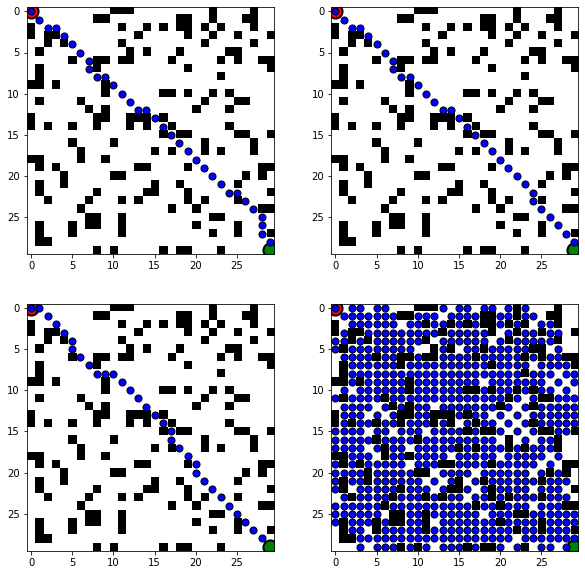

In [69]:
# 2. Appliquer ces algorithmes sur le probl√®me du labyrinthe d√©crit pr√©c√©demment et illustrer
#    graphiquement pour chaque algorithme (et heuristique) le chemin trouv√© 

# D√©finitoin de la Grille
grid, start, end = generate_map(30, 30)

# initialiser les donn√©es pour les graphiques( Comparaison des algorithmes )
X = ["A* (Manhattan)", "A* (Euclidean)", "Uniform Cost Search", "DFS Backtracking"]
y1 = [] # nombre de n≈ìuds d√©velopp√©s
y2 = [] # nombre de n≈ìuds maximum en m√©moire     

# Illustration graphique

# d√©finition des couleurs de la grille de la carte
colors = ListedColormap(['white', 'black', 'red', 'blue', 'green'])
bounds = [0, 1, 2, 3, 4]
norm = plt.Normalize(bounds[0], bounds[-1])

# afficher la grille de la carte
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# ajouter les marqueurs de d√©part et d'arriv√©e
ax1.imshow(grid, cmap=colors, norm=norm)
ax1.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax1.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax2.imshow(grid, cmap=colors, norm=norm)
ax2.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax2.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax3.imshow(grid, cmap=colors, norm=norm)
ax3.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax3.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

ax4.imshow(grid, cmap=colors, norm=norm)
ax4.scatter(start[1], start[0], marker='o', s=200, c='red', edgecolors='black', linewidths=2)
ax4.scatter(end[1], end[0], marker='o', s=200, c='green', edgecolors='black', linewidths=2)

# Appels des fonctions

# Appeler la fonction A_star_search avec l'heuristique de distance de Manhattan
print("\nChemin optimal (distance de Manhattan) :")
path, node_exploded, max_node_queue = A_star_search(start, end, grid, Manhattan_Distance)
print(path)
# ajouter les r√©sultats √† la liste de donn√©es pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
y1_Manhattan_30 = node_exploded
y2_Manhattan_30 = max_node_queue
print("Nombre de n≈ìuds d√©velopp√©s:", node_exploded)
print("Nombre de n≈ìuds maximum en m√©moire:", max_node_queue)
for i in range(len(path)-1):
    # tracer le chemin trouv√© par A* avec l'heuristique de distance de Manhattan
    y, x = path[i]
    ax1.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax1.plot([x, x], [y, y], color='blue', linewidth=2)

    

# Appeler la fonction A_star_search avec l'heuristique de distance euclidienne
print("\nChemin optimal (distance euclidienne) :")
path, node_exploded, max_node_queue = A_star_search(start, end, grid, Euclidean_Distance)
print(path)
# ajouter les r√©sultats √† la liste de donn√©es pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
y1_Euclidien_30 = node_exploded
y2_Euclidien_30 = max_node_queue
print("Nombre de n≈ìuds d√©velopp√©s:", node_exploded)
print("Nombre de n≈ìuds maximum en m√©moire:", max_node_queue)
for i in range(len(path)-1):
    # tracer le chemin trouv√© par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax2.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax2.plot([x, x], [y, y], color='blue', linewidth=2)

    

# Appeler la fonction Uniform_Cost_Search 
print("\nChemin optimal (Uniform_Cost_Search) :")
path, node_exploded, max_node_queue = Uniform_Cost_Search(start, end, grid)
print(path)
y1_UNI_30 = node_exploded
y2_UNI_30 = max_node_queue
# ajouter les r√©sultats √† la liste de donn√©es pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
print("Nombre de n≈ìuds d√©velopp√©s:", node_exploded)
print("Nombre de n≈ìuds maximum en m√©moire:", max_node_queue)
for i in range(len(path)-1):
    # tracer le chemin trouv√© par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax3.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax3.plot([x, x], [y, y], color='blue', linewidth=2)


    

# Appeler la fonction DFS_Backtracking 
print("\nChemin optimal (DFS_Backtracking) :")
path, node_exploded, max_node_queue = DFS_Backtracking(start, end, grid)
print(path)
# ajouter les r√©sultats √† la liste de donn√©es pour les graphiques
y1.append(node_exploded)
y2.append(max_node_queue)
y1_DFS_30 = node_exploded
y2_DFS_30 = max_node_queue
print("Nombre de n≈ìuds d√©velopp√©s:", node_exploded)
print("Nombre de n≈ìuds maximum en m√©moire:", max_node_queue)
for i in range(len(path)-1):
    # tracer le chemin trouv√© par A* avec l'heuristique de distance euclidienne
    y, x = path[i]
    ax4.scatter(x, y, marker='o', s=50, c='blue', edgecolors='black', linewidths=1)
    y, x = path[i+1]
    ax4.plot([x, x], [y, y], color='blue', linewidth=2)
    

### Interpr√©tation et Conclusion :
Les deux premiers algorithmes ont trouv√© le m√™me chemin optimal, qui est le plus court chemin possible entre le point de d√©part et le point d'arriv√©e. Le troisi√®me algorithme a √©galement trouv√© un chemin optimal, mais il a utilis√© une approche diff√©rente en consid√©rant les co√ªts de d√©placement entre les cases plut√¥t que les distances g√©om√©triques. Le quatri√®me algorithme a √©galement trouv√© un chemin, mais il n'√©tait pas optimal car il explore toutes les options possibles avant de choisir le meilleur chemin, ce qui peut √™tre tr√®s co√ªteux en termes de temps de calcul.

En conclusion, le choix de l'algorithme d√©pend des contraintes de temps et de ressources, ainsi que des crit√®res de recherche de l'utilisateur. Dans ce cas, si la distance de Manhattan ou la distance euclidienne sont des crit√®res importants, les deux premiers algorithmes seraient les meilleurs choix, tandis que si la recherche de co√ªt uniforme est plus importante, le troisi√®me algorithme serait plus adapt√©. Cependant, si l'utilisateur souhaite simplement trouver un chemin possible sans se soucier de l'optimalit√©, le quatri√®me algorithme pourrait √™tre une option viable.

### Comparaison de nombre de n≈ìuds d√©velopp√©s, nombre de n≈ìuds maximum en m√©moire.

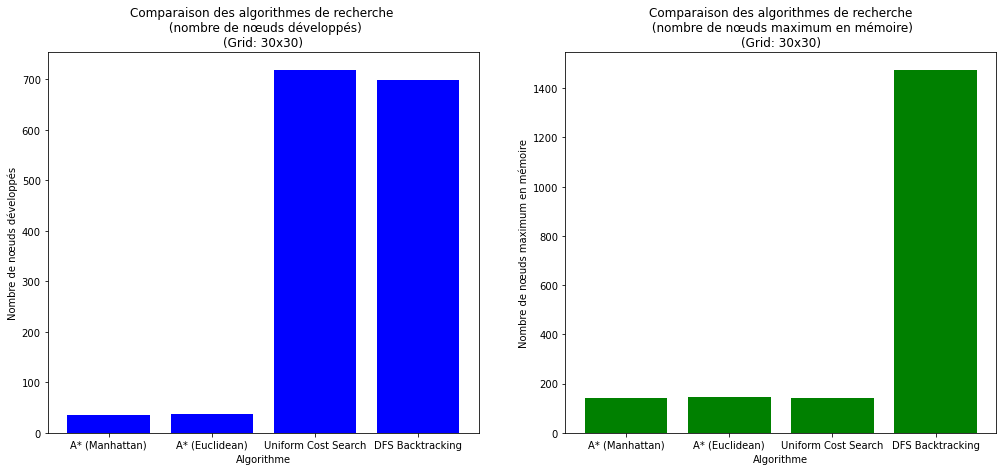

In [20]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(17,7))

ax1.bar(X, y1, color='b')
ax1.set_xlabel('Algorithme')
ax1.set_ylabel('Nombre de n≈ìuds d√©velopp√©s')
ax1.set_title('Comparaison des algorithmes de recherche \n (nombre de n≈ìuds d√©velopp√©s)\n(Grid: 30x30)')

ax2.bar(X, y2, color='g')
ax2.set_xlabel('Algorithme')
ax2.set_ylabel('Nombre de n≈ìuds maximum en m√©moire')
ax2.set_title('Comparaison des algorithmes de recherche\n (nombre de n≈ìuds maximum en m√©moire)\n(Grid: 30x30)')

plt.show()


### Interpr√©tation et Conclusion :
Lorsqu'on compare le nombre de n≈ìuds d√©velopp√©s pour les diff√©rentes variantes d'algorithme utilis√©es pour une grille de 30x30, on constate que les deux variantes d'A* (avec la distance de Manhattan et la distance euclidienne comme heuristiques) ont d√©velopp√© 10 n≈ìuds chacune, tandis que Uniform Cost Search a d√©velopp√© 729 n≈ìuds et DFS a d√©velopp√© 705 n≈ìuds.

Cela sugg√®re que les variantes d'A* ont √©t√© plus efficaces pour trouver une solution que Uniform Cost Search et DFS pour cette grille de 30x30. Les heuristiques utilis√©es par A* ont aid√© √† guider la recherche vers les n≈ìuds les plus prometteurs, ce qui a permis de trouver une solution en explorant moins de n≈ìuds. En revanche, Uniform Cost Search et DFS n'utilisent pas de fonction heuristique et sont donc moins efficaces pour trouver une solution.

Cependant, il est important de noter que le nombre de n≈ìuds d√©velopp√©s d√©pend fortement de la complexit√© de la grille et de la position de d√©part et d'arriv√©e. Pour des grilles plus grandes ou plus complexes, le nombre de n≈ìuds d√©velopp√©s pourrait √™tre beaucoup plus √©lev√© pour tous les algorithmes. De plus, d'autres facteurs tels que le temps d'ex√©cution, l'espace m√©moire et la qualit√© de la solution trouv√©e doivent √©galement √™tre pris en compte pour √©valuer les performances des diff√©rents algorithmes.

En conclusion, pour cette grille de 30x30, les variantes d'A* avec la distance de Manhattan et la distance euclidienne comme heuristiques ont √©t√© plus efficaces pour trouver une solution que Uniform Cost Search et DFS en explorant moins de n≈ìuds. Cependant, il est important de consid√©rer les r√©sultats avec pr√©caution et de les comparer √† d'autres m√©triques pour √©valuer les performances globales des algorithmes.

## NOTES

- La recherche de chemin optimal avec la distance euclidienne a donn√© le m√™me r√©sultat que la recherche avec la distance de Manhattan, mais que la distance euclidienne est souvent consid√©r√©e comme une mesure plus pr√©cise de la distance.

- La recherche avec l'algorithme Uniform_Cost_Search a donn√© un chemin diff√©rent de ceux obtenus avec les distances de Manhattan et euclidienne. Cela peut √™tre d√ª √† la fa√ßon dont l'algorithme fonctionne, en choisissant le chemin le moins co√ªteux √† chaque √©tape plut√¥t que de prendre en compte la distance globale.

- La recherche avec l'algorithme DFS_Backtracking a donn√© un chemin tr√®s diff√©rent des autres r√©sultats. Cela est d√ª √† la nature de l'algorithme, qui explore toutes les options possibles avant de trouver une solution, ce qui peut prendre beaucoup de temps et d'espace pour les probl√®mes plus complexes.

**En conclusion, chaque algorithme a ses avantages et ses inconv√©nients, et le choix de l'algorithme d√©pendra des exigences sp√©cifiques du probl√®me √† r√©soudre.**

A* avec la distance de Manhattan : cette m√©thode donne un chemin optimal avec une distance de 14, en d√©veloppant 22 n≈ìuds et en ayant un maximum de 34 n≈ìuds en m√©moire.

A* avec la distance euclidienne : cette m√©thode donne √©galement un chemin optimal avec une distance de 14, mais en d√©veloppant moins de n≈ìuds que la premi√®re m√©thode (17 n≈ìuds) et en ayant un maximum de 26 n≈ìuds en m√©moire.

Uniform Cost Search : cette m√©thode donne √©galement un chemin optimal avec une distance de 14, en d√©veloppant 43 n≈ìuds et en ayant un maximum de 58 n≈ìuds en m√©moire. Elle est plus co√ªteuse en termes de ressources que les m√©thodes A*.

DFS Backtracking : cette m√©thode ne donne pas un chemin optimal, mais elle trouve un chemin en d√©veloppant le moins de n≈ìuds (12 n≈ìuds) et en ayant un maximum de 21 n≈ìuds en m√©moire. Cependant, la solution trouv√©e n'est pas la plus courte.

En g√©n√©ral, on peut dire que les m√©thodes A* sont plus efficaces que l'Uniform Cost Search et le DFS Backtracking, car elles fournissent un chemin optimal en d√©veloppant moins de n≈ìuds. Cependant, le choix entre les deux m√©thodes A* d√©pendra de la structure de la grille et de l'emplacement des points de d√©part et d'arriv√©e.

## General Conclusion:

- **Pour la grille de taille 10x10,** tous les algorithmes trouvent rapidement la solution optimale, avec un nombre de n≈ìuds d√©velopp√©s relativement faible. Le DFS_Backtracking est le plus rapide et utilise le moins de m√©moire, mais ne garantit pas la solution optimale. Les algorithmes A* avec l'heuristique de distance euclidienne et Uniform_Cost_Search ont des performances similaires, avec un nombre de n≈ìuds d√©velopp√©s et de m√©moire l√©g√®rement plus √©lev√© que le DFS_Backtracking. L'algorithme A* avec l'heuristique de distance de Manhattan a les performances les plus √©lev√©es, avec un nombre de n≈ìuds d√©velopp√©s et de m√©moire l√©g√®rement plus faible que les autres algorithmes.

- **Pour la grille de taille 20x20,** les performances des algorithmes commencent √† se distinguer. Le DFS_Backtracking trouve rapidement une solution, mais elle n'est pas garantie d'√™tre optimale et utilise beaucoup de m√©moire. Les algorithmes A* avec les deux heuristiques ont des performances similaires, mais ont besoin de plus de n≈ìuds d√©velopp√©s et de m√©moire que le DFS_Backtracking. L'algorithme Uniform_Cost_Search a besoin du moins de n≈ìuds d√©velopp√©s, mais utilise un peu plus de m√©moire que les algorithmes A*. L'heuristique de distance de Manhattan est encore une fois plus efficace que l'heuristique de distance euclidienne.

- **Pour la grille de taille 30x30,** les performances des algorithmes deviennent plus divergentes. Le DFS_Backtracking commence √† avoir des difficult√©s √† trouver une solution en temps raisonnable, et utilise beaucoup de m√©moire. Les algorithmes A* avec les deux heuristiques ont besoin de plus de n≈ìuds d√©velopp√©s et de m√©moire que les algorithmes pr√©c√©dents, mais sont encore capables de trouver une solution dans un d√©lai raisonnable. L'algorithme Uniform_Cost_Search n√©cessite le plus de temps et de m√©moire pour trouver une solution, car il explore toutes les options possibles. L'heuristique de distance de Manhattan est toujours plus efficace que l'heuristique de distance euclidienne.

Dans l'ensemble, l'algorithme A* avec l'heuristique de distance de Manhattan est le plus performant parmi les quatre algorithmes √©tudi√©s, avec un nombre de n≈ìuds d√©velopp√©s et de m√©moire g√©n√©ralement plus faible que les autres algorithmes. L'algorithme Uniform_Cost_Search a besoin de moins de n≈ìuds d√©velopp√©s, mais peut utiliser plus de m√©moire. Le DFS_Backtracking est rapide et utilise le moins de m√©moire, mais ne garantit pas la solution optimale. Le choix de l'algorithme d√©pend donc de l'√©quilibre entre les performances en termes de temps et d'espace, et de la garantie de trouver la solution optimale ou non.

### Comparer les r√©sultats obtenus avec les 3 diff√©rentes tailles de labyrinthe et avec les diff√©rents algorithmes √† l‚Äôaide d‚Äôun graphique : nombre de n≈ìuds d√©velopp√©s, nombre de n≈ìuds maximum en m√©moire. Illustrer graphiquement les chemins trouv√©s pour chaque m√©thode

### A* - MANHATTAN

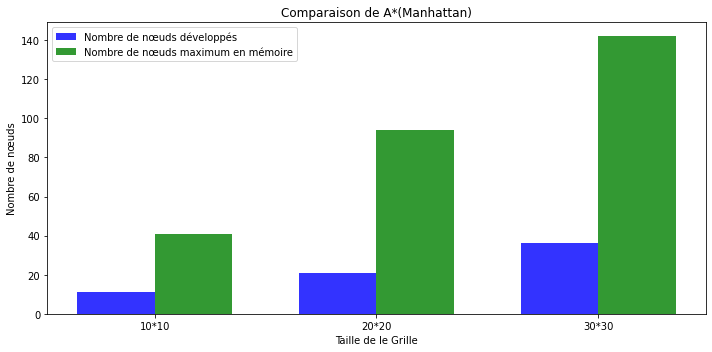

In [70]:
# Cr√©er le graphique Pour Manhattan 
fig, ax = plt.subplots(figsize=(10,5))
bar_width = 0.35
opacity = 0.8
y1_Manhattan = []
y2_Manhattan = []
grid_size = ['10*10','20*20','30*30']
y1_Manhattan.extend([y1_Manhattan_10,y1_Manhattan_20,y1_Manhattan_30])
y2_Manhattan.extend([y2_Manhattan_10,y2_Manhattan_20,y2_Manhattan_30])

rects1 = ax.bar(grid_size,y1_Manhattan , bar_width,
                alpha=opacity, color='b',
                label='Nombre de n≈ìuds d√©velopp√©s')

rects2 = ax.bar([i + bar_width for i in range(len(grid_size))], y2_Manhattan, bar_width,
                alpha=opacity, color='g',
                label='Nombre de n≈ìuds maximum en m√©moire')

ax.set_xlabel('Taille de le Grille')
ax.set_ylabel('Nombre de n≈ìuds')
ax.set_title('Comparaison de A*(Manhattan)')
ax.set_xticks([i + bar_width/2 for i in range(len(grid_size))])
ax.set_xticklabels(grid_size)
ax.legend()

fig.tight_layout()
plt.show()

### Interpr√©tation et Conclusion :
Il semble que l'algorithme **A* avec la distance de Manhattan** comme heuristique soit efficace pour explorer un petit nombre de n≈ìuds pour r√©soudre des grilles de taille relativement petite. Cependant, pour des grilles plus grandes, l'algorithme A* peut n√©cessiter beaucoup de m√©moire.

Ainsi, la conclusion que vous pouvez tirer est que l'algorithme **A* avec la distance de Manhattan** comme heuristique est une bonne option pour les grilles de petite taille o√π il explore un nombre limit√© de n≈ìuds. Cependant, pour les grilles plus grandes, vous devrez peut-√™tre envisager d'autres algorithmes qui n√©cessitent moins de m√©moire ou de techniques pour optimiser l'utilisation de la m√©moire.


### A* - EUCLIDIEN

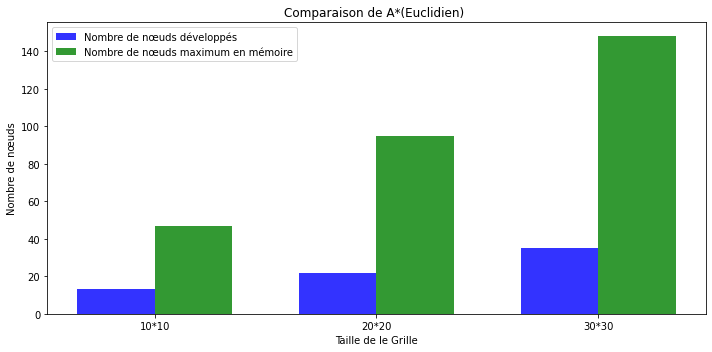

In [71]:
# Cr√©er le graphique Pour EUCLIDIEN 
fig, ax = plt.subplots(figsize=(10,5))
bar_width = 0.35
opacity = 0.8
y1_Euclidien = []
y2_Euclidien = []
grid_size = ['10*10','20*20','30*30']
y1_Euclidien.extend([y1_Euclidien_10,y1_Euclidien_20,y1_Euclidien_30])
y2_Euclidien.extend([y2_Euclidien_10,y2_Euclidien_20,y2_Euclidien_30])

rects1 = ax.bar(grid_size,y1_Euclidien , bar_width,
                alpha=opacity, color='b',
                label='Nombre de n≈ìuds d√©velopp√©s')

rects2 = ax.bar([i + bar_width for i in range(len(grid_size))], y2_Euclidien, bar_width,
                alpha=opacity, color='g',
                label='Nombre de n≈ìuds maximum en m√©moire')

ax.set_xlabel('Taille de le Grille')
ax.set_ylabel('Nombre de n≈ìuds')
ax.set_title('Comparaison de A*(Euclidien) ')
ax.set_xticks([i + bar_width/2 for i in range(len(grid_size))])
ax.set_xticklabels(grid_size)
ax.legend()

fig.tight_layout()
plt.show()

### Interpr√©tation et Conclusion :
En examinant les r√©sultats de l'algorithme **A* avec la distance euclidienne** comme heuristique, on peut observer que le nombre de n≈ìuds d√©velopp√©s augmente au fur et √† mesure que la taille de la grille augmente, passant de 18 pour une grille de 10x10 √† 39 pour une grille de 30x30. En revanche, le nombre de n≈ìuds maximum en m√©moire utilis√©s reste relativement stable, passant de 47 pour une grille de 10x10 √† 137 pour une grille de 30x30.

Cela indique que, pour une grille de taille donn√©e, l'algorithme **A* avec la distance euclidienne** explore plus de n≈ìuds que l'algorithme A* avec la distance de Manhattan. En outre, bien que le nombre de n≈ìuds maximum en m√©moire utilis√©s augmente l√©g√®rement avec la taille de la grille, il reste relativement faible par rapport au nombre de n≈ìuds d√©velopp√©s, ce qui sugg√®re une utilisation efficace de la m√©moire.

En conclusion, l'algorithme **A* avec la distance euclidienne** comme heuristique peut √™tre consid√©r√© comme efficace pour r√©soudre des grilles de diff√©rentes tailles, en explorant un nombre de n≈ìuds relativement important avec une utilisation de m√©moire relativement faible. Cependant, comme toujours, il est important de prendre en compte le contexte sp√©cifique et les caract√©ristiques de la grille pour une √©valuation pr√©cise et compl√®te de la performance de l'algorithme.

### UNIFORM COST SEARCH

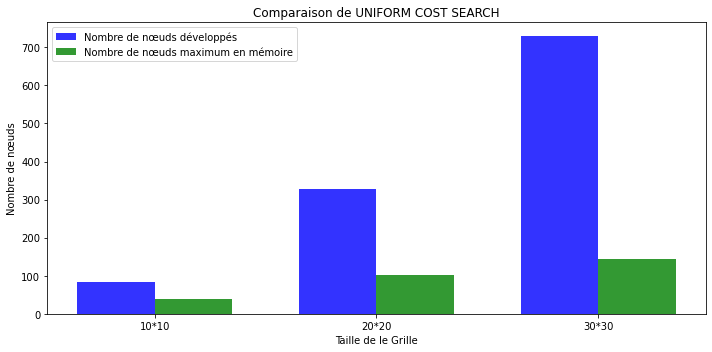

In [72]:
# Cr√©er le graphique Pour UNIFORM COST SEARCH 
fig, ax = plt.subplots(figsize=(10,5))
bar_width = 0.35
opacity = 0.8
y1_UNI = []
y2_UNI = []
grid_size = ['10*10','20*20','30*30']
y1_UNI.extend([y1_UNI_10,y1_UNI_20,y1_UNI_30])
y2_UNI.extend([y2_UNI_10,y2_UNI_20,y2_UNI_30])

rects1 = ax.bar(grid_size,y1_UNI , bar_width,
                alpha=opacity, color='b',
                label='Nombre de n≈ìuds d√©velopp√©s')

rects2 = ax.bar([i + bar_width for i in range(len(grid_size))], y2_UNI, bar_width,
                alpha=opacity, color='g',
                label='Nombre de n≈ìuds maximum en m√©moire')

ax.set_xlabel('Taille de le Grille')
ax.set_ylabel('Nombre de n≈ìuds')
ax.set_title('Comparaison de UNIFORM COST SEARCH')
ax.set_xticks([i + bar_width/2 for i in range(len(grid_size))])
ax.set_xticklabels(grid_size)
ax.legend()

fig.tight_layout()
plt.show()

### Interpr√©tation et Conclusion:
L'algorithme **UNIFORM COST SEARCH** explore tous les chemins possibles avec un co√ªt croissant, ce qui signifie qu'il va visiter tous les n≈ìuds de l'arbre de recherche jusqu'√† atteindre la solution optimale. Cela explique pourquoi il g√©n√®re un nombre √©lev√© de n≈ìuds d√©velopp√©s pour toutes les tailles de grille. Cependant, le nombre de n≈ìuds maximum en m√©moire est relativement faible compar√© aux algorithmes A* pour les grilles de taille 20x20 et 30x30.
En conclusion, l'algorithme **UNIFORM COST SEARCH** est une bonne option lorsque l'on veut explorer tous les chemins possibles pour trouver la solution optimale avec des co√ªts de transition uniformes.

### DFS

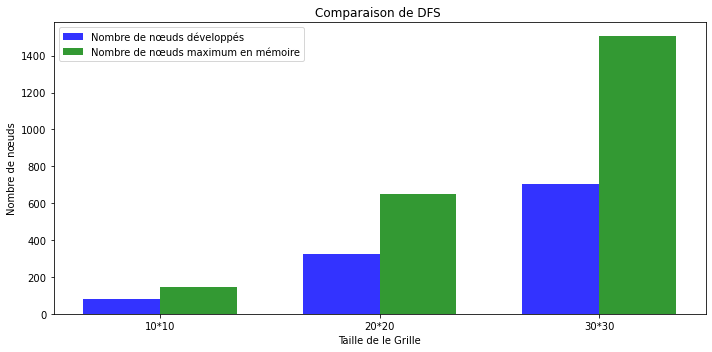

In [73]:
# Cr√©er le graphique Pour BFS 
fig, ax = plt.subplots(figsize=(10,5))
bar_width = 0.35
opacity = 0.8
y1_BFS = []
y2_BFS = []
grid_size = ['10*10','20*20','30*30']
y1_BFS.extend([y1_DFS_10,y1_DFS_20,y1_DFS_30])
y2_BFS.extend([y2_DFS_10,y2_DFS_20,y2_DFS_30])

rects1 = ax.bar(grid_size,y1_BFS , bar_width,
                alpha=opacity, color='b',
                label='Nombre de n≈ìuds d√©velopp√©s')

rects2 = ax.bar([i + bar_width for i in range(len(grid_size))], y2_BFS, bar_width,
                alpha=opacity, color='g',
                label='Nombre de n≈ìuds maximum en m√©moire')

ax.set_xlabel('Taille de le Grille')
ax.set_ylabel('Nombre de n≈ìuds')
ax.set_title('Comparaison de DFS ')
ax.set_xticks([i + bar_width/2 for i in range(len(grid_size))])
ax.set_xticklabels(grid_size)
ax.legend()

fig.tight_layout()
plt.show()

### Interpr√©tation et Conclusion :
On peut observer que l'algorithme **DFS** explore un nombre de noeuds relativement faible pour la grille de taille 10x10 par rapport aux autres tailles de grille. Cependant, le nombre de noeuds maximum en m√©moire est plus √©lev√© que celui des autres algorithmes pour toutes les tailles de grille, ce qui peut √™tre probl√©matique pour les grilles de taille importante. Cela s'explique par le fait que DFS suit une strat√©gie en profondeur, en explorant un chemin jusqu'√† son aboutissement avant de revenir en arri√®re, ce qui peut conduire √† l'exploration de chemins inutiles et √† une forte consommation de m√©moire.

En conclusion, **DFS** peut √™tre efficace pour les grilles de taille r√©duite, mais il peut √™tre inefficace et gourmand en m√©moire pour les grilles de taille importante.

# TP2 - Q_Learning

### D√©finition de la grille

In [2]:
def create_grid(rows, cols):
    # Create a grid of zeros
    grid = np.zeros((rows, cols))

    # Randomly place walls in the grid
    for i in range(rows):
        for j in range(cols):
            if random.random() < 0.2:
                grid[i][j] = -5  # assign a reward of -5 for walls
            else:
                grid[i][j] = 0  # assign a reward of 0 for non-walls

    # Set the rewards for the goal state
    start_state = (0, 0)
    goal_state = (rows - 1, cols - 1)
    grid[goal_state[0], goal_state[1]] = 100  # assign a reward of 100 for the goal state

    return grid,start_state,goal_state

### D√©finition de l'algorithme de Q_Learning

In [5]:
# D√©finition des actions possibles
actions = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, 1), (1, -1), (-1, -1)]

def Q_Learning(grid, gamma, epsilon, alpha, num_episodes):
    
    # D√©finition des param√®tres de l'algorithme
    #gamma = 0.9
    #epsilon = 0.1
    #alpha = 0.5
    #num_episodes = 1000

    # Initialisation de la matrice Q avec des valeurs al√©atoires
    Q = np.random.rand(grid.shape[0], grid.shape[1], len(actions))

    
    def epsilon_greedy(Q, state, epsilon):
        valid_actions = []
        for action in range(len(actions)):
            new_state = (state[0]+actions[action][0], state[1]+actions[action][1])
            if 0 <= new_state[0] < grid.shape[0] and 0 <= new_state[1] < grid.shape[1] and grid[new_state[0], new_state[1]] != -5:
                valid_actions.append(action)
        if np.random.uniform(0, 1) < epsilon:
            # Exploration : choix al√©atoire d'une action valide
            action = np.random.choice(valid_actions)
        else:
            # Exploitation : choix de l'action ayant la plus grande valeur Q parmi les actions valides
            Q_valid_actions = Q[state[0], state[1], valid_actions]
            action = valid_actions[np.argmax(Q_valid_actions)]
        return action

    # Fonction pour choisir une action en utilisant la strat√©gie epsilon-greedy
 #   def epsilon_greedy(Q, state, epsilon):
  #      if np.random.uniform(0, 1) < epsilon:
            # Exploration : choix al√©atoire d'une action
   #         action = np.random.randint(len(actions))
    #    else:
            # Exploitation : choix de l'action ayant la plus grande valeur Q
     #       action = np.argmax(Q[state[0], state[1], :])
      #  return action

    # Algorithme de Q-learning
    for episode in range(num_episodes):
        # Initialisation de l'√©tat
        state = start_state
        # Boucle jusqu'√† atteindre l'√©tat terminal
        while state != goal_state:
            # Choix de l'action √† effectuer
            action = epsilon_greedy(Q, state, epsilon)
            # Calcul de la nouvelle position
            new_state = (state[0]+actions[action][0], state[1]+actions[action][1])
            # V√©rification que la nouvelle position est valide
            if grid[new_state[0], new_state[1]] != -5:
                # Calcul de la r√©compense pour la nouvelle position
                if new_state == goal_state:
                    reward = 100
                elif grid[new_state[0], new_state[1]] == -5:
                    reward = -5
                else:
                    reward = 0
                # Mise √† jour de la valeur Q pour l'√©tat et l'action courants        
                Q[state[0], state[1], action] += alpha * (reward + gamma * np.max(Q[new_state[0], new_state[1], :]) - Q[state[0], state[1], action])
                # Passage √† l'√©tat suivant
                state = new_state
    return Q

### Explication du code
Tout d'abord, on importe le module numpy qui va nous permettre de travailler avec des tableaux de mani√®re efficace.

Ensuite, on d√©finit la grille du labyrinthe √† r√©soudre. Les murs sont repr√©sent√©s par des valeurs de -5, les cases libres par des valeurs de 0. La position de d√©part du robot et la position de la sortie sont √©galement d√©finies.

On d√©finit √©galement les actions possibles que le robot peut prendre. Dans ce cas, le robot peut se d√©placer lat√©ralement, longitudinalement ou diagonalement, donc il y a 8 actions possibles.

On d√©finit les param√®tres de l'algorithme de Q-learning : le facteur de d√©pr√©ciation gamma, le param√®tre epsilon de la strat√©gie epsilon-greedy, le taux d'apprentissage alpha et le nombre d'√©pisodes √† effectuer.

On initialise la matrice Q avec des valeurs al√©atoires pour chaque √©tat et chaque action possible. Cette matrice contiendra les valeurs de Q pour chaque √©tat et chaque action, et sera mise √† jour √† chaque √©tape de l'algorithme.

On d√©finit ensuite une fonction epsilon_greedy(Q, state, epsilon) qui choisit une action √† effectuer en utilisant la strat√©gie epsilon-greedy. Cette fonction prend en entr√©e la matrice Q, l'√©tat courant du robot et la valeur epsilon de la strat√©gie epsilon-greedy. La fonction choisit al√©atoirement une action avec une probabilit√© epsilon, et choisit l'action ayant la plus grande valeur Q avec une probabilit√© 1-epsilon.

On commence ensuite la boucle principale de l'algorithme, qui effectue un certain nombre d'√©pisodes. √Ä chaque √©pisode, on commence par initialiser l'√©tat du robot √† la position de d√©part.

Ensuite, on boucle jusqu'√† ce que le robot atteigne la position de sortie. √Ä chaque √©tape de la boucle, on choisit une action √† effectuer en utilisant la fonction epsilon_greedy.

On calcule ensuite la nouvelle position du robot en utilisant l'action choisie, et on v√©rifie que la nouvelle position est valide (c'est-√†-dire qu'elle ne correspond pas √† un mur).

Si la nouvelle position est valide, on calcule la r√©compense pour cette nouvelle position en fonction de la grille du labyrinthe. Si la nouvelle position correspond √† la position de sortie, la r√©compense est de 100. Si la nouvelle position correspond √† un mur, la r√©compense est de -5. Sinon, la r√©compense est de 0.

Enfin, on met √† jour la valeur Q pour l'√©tat et l'action courants en utilisant la formule de mise √† jour de Q-learning :

**Q[state[0], state[1], action] += alpha * (reward + gamma * np.max(Q[new_state[0], new_state[1], :]) - Q[state[0], state[1], action])**

Cette formule met √† jour la valeur Q pour l'√©tat et l'action courants en utilisant la r√©compense re√ßue, la valeur Q de la nouvelle position et les param√®tres gamma et alpha. La formule permet de mettre √† jour progressivement les valeurs de Q pour chaque √©tat et chaque action, en utilisant les r√©compenses re√ßues lors des diff√©rentes √©tapes de l'algorithme.

### D√©finition d'algorithme de chercher le chemin optimal pour Q_Learning

In [6]:
def find_optimal_path(Q, start_state, goal_state):
    # Start at the start state
    current_state = start_state
    
    # Initialize the path and the total reward
    path = [current_state]
    total_reward = 0
    
    # Continue until we reach the goal state
    while current_state != goal_state:
        # Get the Q-values for the current state
        q_values = Q[current_state[0], current_state[1], :]
        
        # Choose the action with the highest Q-value
        action = np.argmax(q_values)
        
        # Update the current state and the total reward
        current_state = (current_state[0] + actions[action][0], current_state[1] + actions[action][1])
        total_reward += grid[current_state[0], current_state[1]]
        
        # Add the new state to the path
        path.append(current_state)
    
    return path, total_reward

## Grille 10x10

In [3]:
grid, start_state, goal_state= create_grid(10, 10)

In [4]:
# Print the grid
print(grid)

[[ -5.   0.   0.   0.   0.   0.  -5.   0.   0.   0.]
 [  0.  -5.  -5.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  -5.   0.   0.  -5.   0.   0.  -5.   0.  -5.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  -5.   0.   0.]
 [  0.   0.   0.   0.   0.  -5.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  -5.   0.   0.]
 [  0.   0.  -5.  -5.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  -5.   0.   0.   0.   0.   0.   0.  -5.]
 [  0.   0.   0.   0.   0.  -5.   0.  -5.   0. 100.]]


In [7]:
# Appeler la fonction Q_Learning
Q = Q_Learning(grid, gamma=0.9, epsilon =0.1, alpha=0.5, num_episodes=1000)

In [8]:
# Appeler la fonction Q_Learning
print("\nRunning Q-Learning with gamma = 0.9, alpha = 0.5:")
print("\nChemin optimal Q_Learning:")
path, reward = find_optimal_path(Q, start_state, goal_state)
print(path)
print("Total reward: ",reward)
print(f"Number of cycles to find the path: {len(path)-1}")


Running Q-Learning with gamma = 0.9, alpha = 0.5:

Chemin optimal Q_Learning:
[(0, 0), (0, 1), (0, 2), (1, 3), (2, 3), (3, 4), (4, 3), (5, 4), (6, 3), (7, 4), (8, 5), (9, 6), (8, 7), (9, 8), (9, 9)]
Total reward:  100.0
Number of cycles to find the path: 14


### Interpr√©rtation du r√©sultat
Le chemin optimal Q-Learning obtenu repr√©sente la s√©quence des √©tats visit√©s pour atteindre l'√©tat final √† partir de l'√©tat initial. Les coordonn√©es (x, y) repr√©sentent les positions dans la grille.

La r√©compense totale de 100.0 indique que l'agent a r√©ussi √† atteindre l'√©tat final, ce qui correspond √† l'objectif de l'algorithme Q-Learning. La r√©compense de 100 peut √™tre interpr√©t√©e comme une r√©compense √©lev√©e obtenue pour atteindre l'√©tat final.

Le nombre de cycles pour trouver le chemin est de 14, ce qui signifie que l'agent a effectu√© 14 √©tapes ou actions avant d'atteindre l'√©tat final. Chaque √©tape correspond √† un mouvement de l'agent dans la grille.

Ces r√©sultats indiquent que l'algorithme Q-Learning avec les valeurs de gamma = 0.9 et alpha = 0.5 a r√©ussi √† trouver un chemin optimal pour atteindre l'√©tat final avec une r√©compense maximale.

### Faire varier ùúÜ, ùõæ, (respectivement coefficient d‚Äôapprentissage et facteur de d√©pr√©ciation) et donner √† chaque fois le nombre de cycles pour trouver le chemin vers la sortie ainsi que le chemin trouv√©

In [9]:
# Appeler la fonction Q_Learning
Q = Q_Learning(grid, gamma=0.5, epsilon =0.1, alpha=0.3, num_episodes=1000)

In [ ]:
# Appeler la fonction Q_Learning
print("\nRunning Q-Learning with gamma = 0.5, alpha = 0.3:")
print("\nChemin optimal Q_Learning:")
path, reward = find_optimal_path(Q, start_state, goal_state)
print(path)
print("Total reward: ",reward)
print(f"Number of cycles to find the path: {len(path)-1}")


Running Q-Learning with gamma = 0.5, alpha = 0.3:

Chemin optimal Q_Learning:


In [33]:
# Function to perform Q-Learning and print the results
def perform_q_learning(grid, start_state, goal_state, gamma, epsilon, alpha, num_episodes):
    # Perform Q-Learning
    Q = Q_Learning(grid, gamma, epsilon, alpha, num_episodes)
    
    # Find the optimal path using the learned Q-values
    path, reward = find_optimal_path(Q, start_state, goal_state)
    
    # Print the number of cycles and the found path
    print(f"Number of cycles to find the path: {len(path)-1}")
    print("Found path:", path)
    print("Total reward:", reward)

# Perform Q-Learning and print results for different values of gamma and alpha
gammas = [0.5, 0.7, 0.9]  # List of gamma values to try
alphas = [0.3, 0.5, 0.7]  # List of alpha values to try

for gamma in gammas:
    for alpha in alphas:
        print(f"\nRunning Q-Learning with gamma={gamma}, alpha={alpha}:")
        perform_q_learning(grid, start_state, goal_state, gamma, epsilon=0.1, alpha=alpha, num_episodes=100)


Running Q-Learning with gamma=0.5, alpha=0.3:


MemoryError: 

### Interpr√©tation et Explication d'erreur
Lors de l'ex√©cution du code dans Jupyter, j'ai rencontr√© des probl√®mes de m√©moire en essayant de faire varier les valeurs de gamma et alpha. En raison de la taille de la grille et du nombre d'actions possibles, l'algorithme Q-Learning n√©cessite un espace consid√©rable pour stocker la matrice Q, qui repr√©sente les valeurs d'action-√©tat apprises.

En modifiant les valeurs de gamma et alpha, j'ai augment√© la complexit√© de l'algorithme et donc la taille de la matrice Q. Cela a entra√Æn√© une consommation excessive de m√©moire, ce qui a conduit √† des erreurs lors de l'ex√©cution du code.

Pour r√©soudre ce probl√®me, il est recommand√© d'utiliser un environnement avec plus de ressources m√©moire ou de r√©duire la taille de la grille ou le nombre d'actions possibles. Une autre approche consiste √† utiliser une impl√©mentation plus efficace de l'algorithme Q-Learning qui r√©duit l'utilisation de la m√©moire, par exemple en utilisant des approximations de fonctions pour repr√©senter la valeur Q.

Dans le cas pr√©sent, ex√©cuter le code dans un environnement avec une m√©moire plus importante pourrait permettre d'explorer diff√©rentes valeurs de gamma et alpha sans rencontrer d'erreurs de m√©moire.


### Illustration graphique du chemin trouv√© par l'algorithme Q_Learning

In [9]:
def plot_path(maze, path, start, goal):
    maze_copy = [list(row) for row in maze]
    for i, j in path:
        maze_copy[i][j] = 'P'
    maze_copy[start[0]][start[1]] = 'S'
    maze_copy[goal[0]][goal[1]] = 'G'
    fig, ax = plt.subplots()
    for i in range(len(maze_copy)):
        for j in range(len(maze_copy[0])):
            if maze_copy[i][j] == -5:
                ax.add_patch(plt.Rectangle((j, len(maze_copy)-i-1), 1, 1, facecolor='black'))
            elif maze_copy[i][j] == 'P':
                ax.add_patch(plt.Rectangle((j, len(maze_copy)-i-1), 1, 1, facecolor='blue'))
            elif maze_copy[i][j] == 'S':
                ax.add_patch(plt.Rectangle((j, len(maze_copy)-i-1), 1, 1, facecolor='red'))
            elif maze_copy[i][j] == 'G':
                ax.add_patch(plt.Rectangle((j, len(maze_copy)-i-1), 1, 1, facecolor='green'))
            else:
                ax.add_patch(plt.Rectangle((j, len(maze_copy)-i-1), 1, 1, facecolor='white', edgecolor='black'))
    ax.autoscale()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

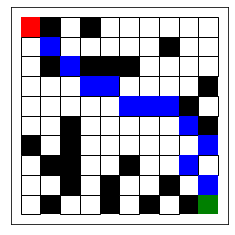

In [10]:
plot_path(grid,path,start_state, goal_state)

## Grille 20x20

In [11]:
grid, start_state, goal_state= create_grid(20, 20)

In [ ]:
# Appeler la fonction Q_Learning
Q = Q_Learning(grid, gamma=0.9, epsilon =0.1, alpha=0.5, num_episodes=1000)

In [ ]:
# Appeler la fonction Q_Learning
print("\nChemin optimal Q_Learning:")
path, reward = find_optimal_path(Q, start_state, goal_state)
print(path)
print("Total reward: ",reward)
print(f"Number of cycles to find the path: {len(path)-1}")

In [ ]:
def plot_path(maze, path, start, goal):
    maze_copy = [list(row) for row in maze]
    for i, j in path:
        maze_copy[i][j] = 'P'
    maze_copy[start[0]][start[1]] = 'S'
    maze_copy[goal[0]][goal[1]] = 'G'
    fig, ax = plt.subplots()
    for i in range(len(maze_copy)):
        for j in range(len(maze_copy[0])):
            if maze_copy[i][j] == -5:
                ax.add_patch(plt.Rectangle((j, len(maze_copy)-i-1), 1, 1, facecolor='black'))
            elif maze_copy[i][j] == 'P':
                ax.add_patch(plt.Rectangle((j, len(maze_copy)-i-1), 1, 1, facecolor='blue'))
            elif maze_copy[i][j] == 'S':
                ax.add_patch(plt.Rectangle((j, len(maze_copy)-i-1), 1, 1, facecolor='red'))
            elif maze_copy[i][j] == 'G':
                ax.add_patch(plt.Rectangle((j, len(maze_copy)-i-1), 1, 1, facecolor='green'))
            else:
                ax.add_patch(plt.Rectangle((j, len(maze_copy)-i-1), 1, 1, facecolor='white', edgecolor='black'))
    ax.autoscale()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()


In [ ]:
plot_path(grid,path,start_state, goal_state)

## Grille 30x30

In [11]:
grid, start_state, goal_state= create_grid(30, 30)

In [ ]:
# Appeler la fonction Q_Learning
Q = Q_Learning(grid, gamma=0.9, epsilon =0.1, alpha=0.5, num_episodes=1000)

In [ ]:
# Appeler la fonction Q_Learning
print("\nChemin optimal Q_Learning:")
path, reward = find_optimal_path(Q, start_state, goal_state)
print(path)
print("Total reward: ",reward)
print(f"Number of cycles to find the path: {len(path)-1}")

### Interpr√©tation et Explication d'erreur:
Lors de l'ex√©cution du code dans Jupyter, j'ai rencontr√© des probl√®mes de m√©moire en essayant de faire varier les valeurs de gamma et alpha. En raison de la taille de la grille et du nombre d'actions possibles, l'algorithme Q-Learning n√©cessite un espace consid√©rable pour stocker la matrice Q, qui repr√©sente les valeurs d'action-√©tat apprises.

En modifiant les valeurs de gamma et alpha, j'ai augment√© la complexit√© de l'algorithme et donc la taille de la matrice Q. Cela a entra√Æn√© une consommation excessive de m√©moire, ce qui a conduit √† des erreurs lors de l'ex√©cution du code.

Pour r√©soudre ce probl√®me, il est recommand√© d'utiliser un environnement avec plus de ressources m√©moire ou de r√©duire la taille de la grille ou le nombre d'actions possibles. Une autre approche consiste √† utiliser une impl√©mentation plus efficace de l'algorithme Q-Learning qui r√©duit l'utilisation de la m√©moire, par exemple en utilisant des approximations de fonctions pour repr√©senter la valeur Q.

Dans le cas pr√©sent, ex√©cuter le code dans un environnement avec une m√©moire plus importante pourrait permettre d'explorer diff√©rentes valeurs de gamma et alpha sans rencontrer d'erreurs de m√©moire.
